## German_dataset


*   Column 24 is "y" or "label"
*   700 (good) & 300 (bad)






In [577]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.mixture import GaussianMixture

In [578]:
# cols = ["Status_check_acc","Duration_in_month","Credit_history","Purpose","Credit_amount","Savings_account/bonds"," Present_employment_since","Installment_rate_in_%_disposable_income",]

In [579]:
df = pd.read_csv("/Users/shannonholmes/Desktop/Python Programs/ML/german_data-numeric.dat", sep =r'\s+', header=None, )
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [580]:
y = df[24]
x = df.drop(columns = 24)

### Plotting a correlation_matrix

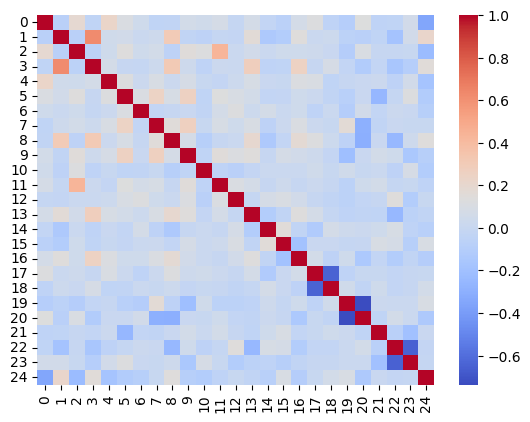

In [581]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

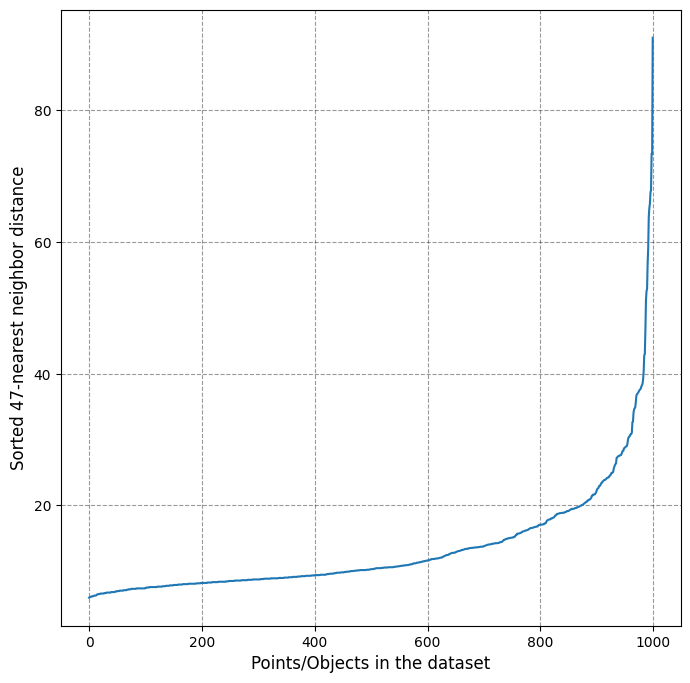

0.674253316510095
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0

In [582]:
## DBSCAN Implementation
## Get Eps Hyperparameter with elbow method
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * x.shape[-1] - 1 
get_kdist_plot(X=x, k=k)

## Perform DBScan 
db = DBSCAN(eps=25,min_samples=6).fit(x)
labels = db.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
Core_labels = labels[db.core_sample_indices_]


score = metrics.silhouette_score(x,labels)
print(score)
print(labels)



In [583]:
## Gaussian Mixture Model
gm = GaussianMixture(n_components=2, random_state=0).fit(x)

cluster_label = gm.predict(x)

print(gm.means_)

score = metrics.silhouette_score(x,cluster_label)

print(score)

[[ 2.62541806 21.37681159  2.55629877 33.46822742  2.13043478  3.43812709
   2.67112598  2.86845039  2.42363434 35.52508361  2.68115942  1.40802676
   1.14827202  1.42363434  1.          0.2173913   0.10925307  0.96098105
   0.03901895  0.17502787  0.71014493  0.          0.18952062  0.64882943]
 [ 2.15533981 16.77669903  2.44660194 26.11650485  1.88349515  2.91262136
   2.77669903  2.6407767   1.78640777 35.72815534  2.62135922  1.39805825
   1.21359223  1.23300971  1.3592233   0.37864078  0.04854369  0.4368932
   0.05825243  0.21359223  0.73786408  0.21359223  0.29126214  0.46601942]]
-0.03976632184312063


## Australian Dataset



*   column 14 is the y label
*   0    383
*   1    307






In [584]:
data = pd.read_csv("/Users/shannonholmes/Desktop/Python Programs/ML/australian.dat", sep = "\s+", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Scaling the data

In [585]:
scaler = StandardScaler()
# Select columns to scale
cols_to_scale = [1,2,6,9,12,13]

# Scale the selected columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [586]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,-0.801052,1.347111,2,4,4,-0.190906,0,0,-0.493887,1,2,-0.488358,0.037380,0
1,0,-0.751240,0.450548,2,8,4,-0.615536,0,0,-0.493887,0,2,-0.139591,-0.195413,0
2,0,-0.167856,-0.604823,1,4,4,-0.291083,0,0,-0.493887,1,2,0.557943,-0.195413,0
3,0,-0.835667,1.355152,1,5,3,-0.664877,1,1,1.769760,1,2,-1.069637,-0.195413,1
4,1,-0.962306,0.685745,2,6,4,-0.078768,1,1,2.387119,0,2,-0.720870,-0.165066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0.000152,1.154129,2,14,4,1.278852,1,0,-0.493887,0,2,-1.069637,-0.195413,1
686,1,-0.920093,-0.873189,2,8,4,-0.627497,0,0,-0.493887,0,2,-1.069637,-0.186962,0
687,0,-1.075437,0.961146,2,6,4,-0.639459,1,0,-0.493887,0,2,-0.488358,-0.195413,1
688,0,-0.350217,1.958221,2,14,8,0.257647,1,1,-0.288101,0,2,-0.372103,-0.193301,1


In [587]:
y = data[14]
x= data.drop(columns = 14)

In [588]:
## DBScan
db = DBSCAN(eps=10,min_samples=2).fit(x)
labels = db.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

### Plotting a correlation_matrix

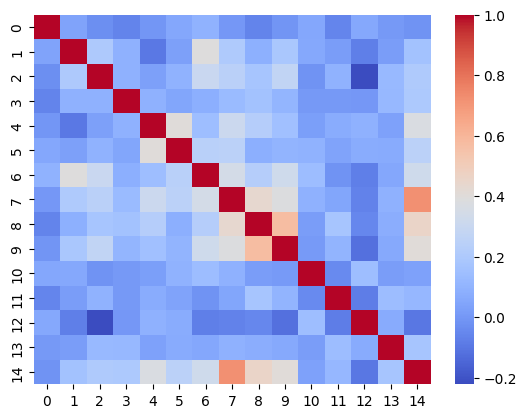

In [589]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()